![logo](http://nci.org.au/wp-content/themes/nci/img/img-logo-large.png)

-------

# Using the GDAL library to read NetCDF data

   
The following material uses Coupled Model Intercomparison Project (CMIP5) collections. The CMIP5 terms of use are found [here](https://cmip.llnl.gov/cmip5/terms.html). For more information on the collection, please [click here](https://geonetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/metadata/f3525_9322_8600_7716).


---------




<div class="alert alert-info">
<b>Library Depedency: </b>
    
    $ module load python/2.7.11
    
    $ module load python/2.7.11-matplotlib
    
    $ module load ipython/4.2.0-py2.7
    
    $ module load gdal/1.11.1-python
    
</div>

<div class="alert alert-info">
<b>Platform Depedency: </b> You will need to run on NCI VDI or NCI JupyterHub instances, where modules are preinstalled and data projects are mounted. When running in NCI JupyterHub, no need to load modules.
</div>

### Import python modules

In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fn = '/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-0/rcp85/mon/ocean/Omon/r1i1p1/latest/pr/pr_Omon_ACCESS1-0_rcp85_r1i1p1_200601-210012.nc'


### Open and view file metadata

Use method `Open(<filename>, <GDALAccess>)` to return a Dataset object.

In [4]:
ds = gdal.Open(fn, gdal.GA_ReadOnly)

**View metadata**



In [5]:
for key, value in ds.GetMetadata().items():
    print('{:35} {}'.format(key, value))

NC_GLOBAL#modeling_realm            ocean
NETCDF_DIM_EXTRA                    {time}
NC_GLOBAL#source                    ACCESS1-0 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1.875 degrees EW x approx 1.25 degree NS, 38 levels); ocean: NOAA/GFDL MOM4p1 (nominal 1.0 degree EW x 1.0 degrees NS, tripolar north of 65N, equatorial refinement to 1/3 degree from 10S to 10 N, cosine dependent NS south of 25S, 50 levels); sea ice: CICE4.1 (nominal 1.0 degree EW x 1.0 degrees NS, tripolar north of 65N, equatorial refinement to 1/3 degree from 10S to 10 N, cosine dependent NS south of 25S); land: MOSES2 (1.875 degree EW x 1.25 degree NS, 4 levels
NC_GLOBAL#tracking_id               2caae357-ac9d-4bb3-81fc-87a06ed3c824
NC_GLOBAL#realization               1
i#long_name                         cell index along first dimension
NC_GLOBAL#experiment_id             rcp85
NC_GLOBAL#experiment                RCP8.5
NC_GLOBAL#table_id                  Table Omon (01 February 2012) 3cc40dbb8d2b9162e4c4c8fd

**Get data dimensions**
Dataset objects have properties corresponding to numbers of rows, columns and bands in the dataset.

In [14]:
cols = ds.RasterXSize
rows = ds.RasterYSize
bands = ds.RasterCount
print (cols,rows,bands)

(360, 300, 1140)
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f7fe6e47a80> >


### View subdatasets

In [7]:
for item in ds.GetSubDatasets():
    print item[0]

NETCDF:"/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-0/rcp85/mon/ocean/Omon/r1i1p1/latest/pr/pr_Omon_ACCESS1-0_rcp85_r1i1p1_200601-210012.nc":time_bnds
NETCDF:"/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-0/rcp85/mon/ocean/Omon/r1i1p1/latest/pr/pr_Omon_ACCESS1-0_rcp85_r1i1p1_200601-210012.nc":lat
NETCDF:"/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-0/rcp85/mon/ocean/Omon/r1i1p1/latest/pr/pr_Omon_ACCESS1-0_rcp85_r1i1p1_200601-210012.nc":lon
NETCDF:"/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-0/rcp85/mon/ocean/Omon/r1i1p1/latest/pr/pr_Omon_ACCESS1-0_rcp85_r1i1p1_200601-210012.nc":lat_vertices
NETCDF:"/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-0/rcp85/mon/ocean/Omon/r1i1p1/latest/pr/pr_Omon_ACCESS1-0_rcp85_r1i1p1_200601-210012.nc":lon_vertices
NETCDF:"/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-0/rcp85/mon/ocean/Omon/r1i1p1/latest/pr/pr_Omon_ACCESS1-0_rcp85_r1i1p1_200601-210012.nc":pr


### Extract/view data subdataset

If the netcdf file has only one variable with 2 dimensions, then you can directly open the dataset with the filename. If there are more than one variable with 2 dimensions, you need to specify the subdataset name (logically).

Subdatasets can be opened using the syntax: **"NETCDF:filename:variable"** or alternatively, the GetSubDatasets() function can be used to grab this information.

In [65]:
# Option 1
band_pr = gdal.Open('NETCDF:"/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-0/rcp85/mon/ocean/Omon/r1i1p1/latest/pr/pr_Omon_ACCESS1-0_rcp85_r1i1p1_200601-210012.nc":pr')

# Option 2
band_pr = gdal.Open(ds.GetSubDatasets()[0][6])

# Option 3
band_pr = ds.GetRasterBand(6)

In [22]:
print("Band shape (Lat, Lon): %r %r" % (band_pr.YSize, band_pr.XSize))

Band shape (Lat, Lon): 300 360


#### The GetMetadata() function can be used on the subdataset
**Note:** The variable metadata is not as user-friendly as with other netcdf python tools (e.g., netCDF4, h5py)

In [85]:
pr_metadata = band_pr.GetMetadata

#print(pr_metadata())

Read the data into a 2D Numeric array with `ReadAsArray` 
ReadAsArray(<xoff>, <yoff>, <xsize>, <ysize>)

Or you can read an entire image at once by using 0 offsets and pass the number of rows and columns to the `ReadAsArray()` method.

**Memory managment**

Set variables to `None`. This is especially important if you created large arrays with `ReadAsArray()`

In [5]:
band = None
dataset = None

### Plotting data

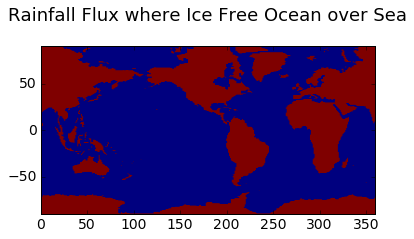

In [84]:
# Plot data 
dataset = band_pr.ReadAsArray(0,0,cols,rows)
plt.imshow(dataset[1,:,:],extent=[0,360,-90,90])

# Add figure title and labels
# We can make use of the defined variable attributes to do this
plt.title(ds.GetMetadata()['pr#long_name']+'\n', fontsize=18)

# Adjust tick mark size
plt.tick_params(labelsize=14)



-----------------
More useful information about GDAL can be found here:

- https://trac.osgeo.org/gdal

- [A youtube video by Robert Simmon](https://www.youtube.com/watch?v=N_dmiQI1s24)

- https://gdal.org/ 
    